<a href="https://colab.research.google.com/github/Damaseni/Sales-Analysis/blob/main/data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("sales_data_sample.csv")

In [12]:
# View summary statistics
print(df.describe())

        ORDERNUMBER  QUANTITYORDERED    PRICEEACH         SALES     MONTH_ID  \
count   2823.000000      2823.000000  2823.000000   2823.000000  2823.000000   
mean   10258.725115        35.092809    83.658544   3553.889072     7.092455   
std       92.085478         9.741443    20.174277   1841.865106     3.656633   
min    10100.000000         6.000000    26.880000    482.130000     1.000000   
25%    10180.000000        27.000000    68.860000   2203.430000     4.000000   
50%    10262.000000        35.000000    95.700000   3184.800000     8.000000   
75%    10333.500000        43.000000   100.000000   4508.000000    11.000000   
max    10425.000000        97.000000   100.000000  14082.800000    12.000000   

          YEAR_ID         MSRP     Discount  
count  2823.00000  2823.000000  2823.000000  
mean   2003.81509   100.715551    17.057007  
std       0.69967    40.187912    30.571804  
min    2003.00000    33.000000   -67.000000  
25%    2003.00000    68.000000    -1.700000  
50%

In [13]:
# Check for missing values
print(df.isnull().sum())

ORDERNUMBER           0
QUANTITYORDERED       0
PRICEEACH             0
SALES                 0
MONTH_ID              0
YEAR_ID               0
PRODUCTLINE           0
MSRP                  0
PRODUCTCODE           0
ADDRESSLINE2       2521
CITY                  0
STATE              1486
POSTALCODE           76
COUNTRY               0
TERRITORY          1074
DEALSIZE              0
Discount              0
dtype: int64


In [14]:
# Display first few rows
print(df.head())

   ORDERNUMBER  QUANTITYORDERED  PRICEEACH    SALES  MONTH_ID  YEAR_ID  \
0        10107               30      95.70  2871.00         2     2003   
1        10121               34      81.35  2765.90         5     2003   
2        10134               41      94.74  3884.34         7     2003   
3        10145               45      83.26  3746.70         8     2003   
4        10159               49     100.00  5205.27        10     2003   

   PRODUCTLINE  MSRP PRODUCTCODE ADDRESSLINE2           CITY STATE POSTALCODE  \
0  Motorcycles    95    S10_1678          NaN            NYC    NY      10022   
1  Motorcycles    95    S10_1678          NaN          Reims   NaN      51100   
2  Motorcycles    95    S10_1678          NaN          Paris   NaN      75508   
3  Motorcycles    95    S10_1678          NaN       Pasadena    CA      90003   
4  Motorcycles    95    S10_1678          NaN  San Francisco    CA        NaN   

  COUNTRY TERRITORY DEALSIZE  Discount  
0     USA       NaN    Smal

In [4]:
df

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,SALES,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,DEALSIZE
0,10107,30,95.70,2871.00,2,2003,Motorcycles,95,S10_1678,NaN,NYC,NY,10022,USA,NaN,Small
1,10121,34,81.35,2765.90,5,2003,Motorcycles,95,S10_1678,NaN,Reims,NaN,51100,France,EMEA,Small
2,10134,41,94.74,3884.34,7,2003,Motorcycles,95,S10_1678,NaN,Paris,NaN,75508,France,EMEA,Medium
3,10145,45,83.26,3746.70,8,2003,Motorcycles,95,S10_1678,NaN,Pasadena,CA,90003,USA,NaN,Medium
4,10159,49,100.00,5205.27,10,2003,Motorcycles,95,S10_1678,NaN,San Francisco,CA,NaN,USA,NaN,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,10350,20,100.00,2244.40,12,2004,Ships,54,S72_3212,NaN,Madrid,NaN,28034,Spain,EMEA,Small
2819,10373,29,100.00,3978.51,1,2005,Ships,54,S72_3212,NaN,Oulu,NaN,90110,Finland,EMEA,Medium
2820,10386,43,100.00,5417.57,3,2005,Ships,54,S72_3212,NaN,Madrid,NaN,28034,Spain,EMEA,Medium
2821,10397,34,62.24,2116.16,3,2005,Ships,54,S72_3212,NaN,Toulouse,NaN,31000,France,EMEA,Small


In [5]:
# Group sales by year and month
sales_trend = df.groupby(["YEAR_ID", "MONTH_ID"])["SALES"].sum().reset_index()

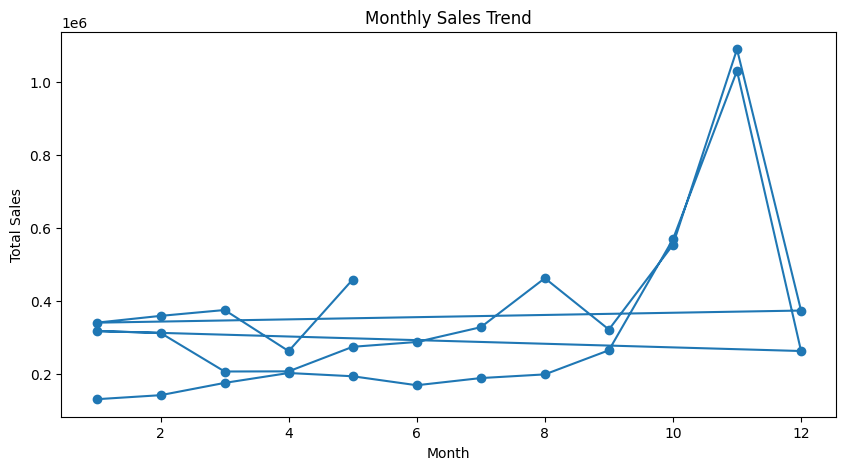

In [6]:
# Plot sales trend
plt.figure(figsize=(10,5))
plt.plot(sales_trend["MONTH_ID"], sales_trend["SALES"], marker='o')
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.title("Monthly Sales Trend")
plt.show()

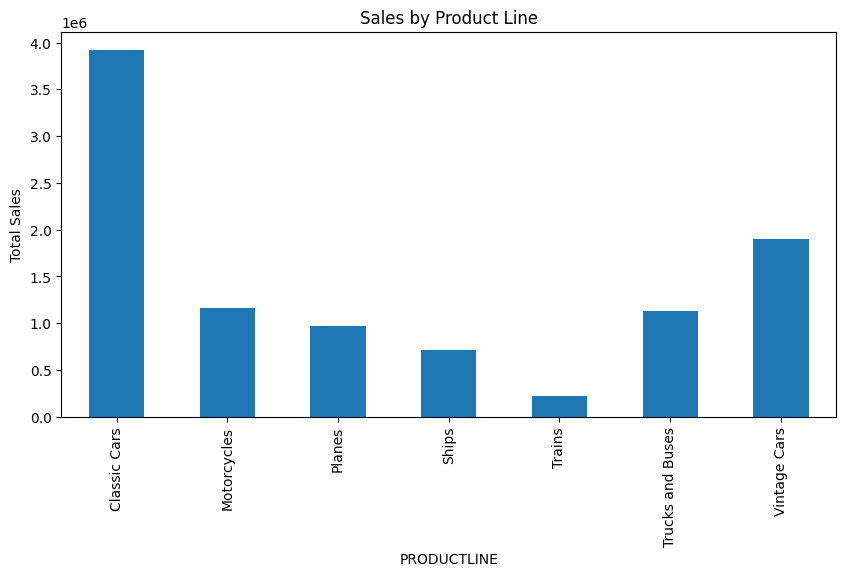

In [7]:
# Aggregate sales by product line
product_sales = df.groupby("PRODUCTLINE")["SALES"].sum()

# Plot product line performance
product_sales.plot(kind="bar", figsize=(10,5), title="Sales by Product Line")
plt.ylabel("Total Sales")
plt.show()

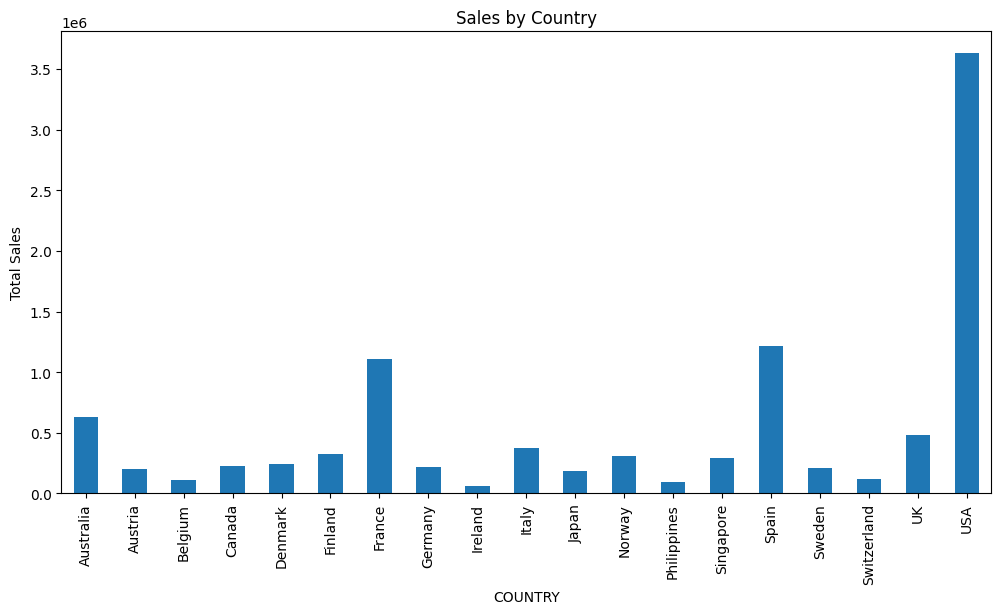

In [8]:
# Aggregate sales by country
country_sales = df.groupby("COUNTRY")["SALES"].sum()

# Plot country-wise sales
country_sales.plot(kind="bar", figsize=(12,6), title="Sales by Country")
plt.ylabel("Total Sales")
plt.show()



In [9]:
# Compare MSRP vs Price Each
df["Discount"] = df["MSRP"] - df["PRICEEACH"]
print(df[["PRODUCTLINE", "MSRP", "PRICEEACH", "Discount"]].head())


   PRODUCTLINE  MSRP  PRICEEACH  Discount
0  Motorcycles    95      95.70     -0.70
1  Motorcycles    95      81.35     13.65
2  Motorcycles    95      94.74      0.26
3  Motorcycles    95      83.26     11.74
4  Motorcycles    95     100.00     -5.00


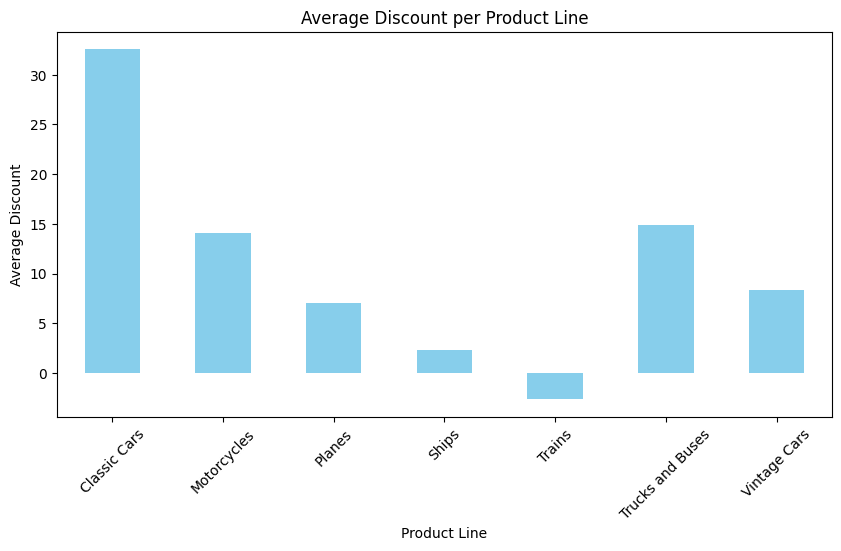

In [16]:
# Calculate average discount per product line
df["Discount"] = df["MSRP"] - df["PRICEEACH"]
avg_discount = df.groupby("PRODUCTLINE")["Discount"].mean()

# Create a clearer bar chart
plt.figure(figsize=(10,5))
avg_discount.plot(kind="bar", color='skyblue')
plt.xlabel("Product Line")
plt.ylabel("Average Discount")
plt.title("Average Discount per Product Line")
plt.xticks(rotation=45)
plt.show()


In [17]:
# Grouping sales by year and month
monthly_sales = df.groupby(["YEAR_ID", "MONTH_ID"])["SALES"].sum().reset_index()

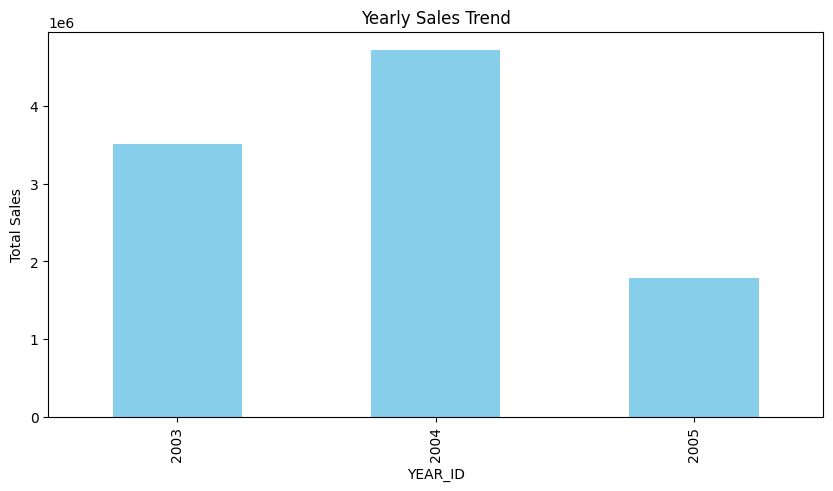

In [19]:
# Yearly sales
yearly_sales = df.groupby("YEAR_ID")["SALES"].sum()
yearly_sales.plot(kind="bar", figsize=(10,5), title="Yearly Sales Trend", color="skyblue")
plt.ylabel("Total Sales")
plt.show()

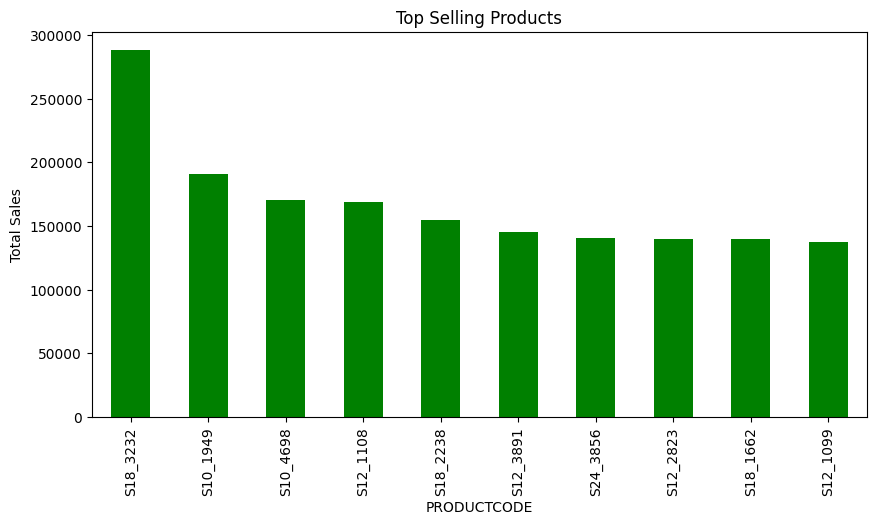

In [21]:
# Best performing product codes
top_products = df.groupby("PRODUCTCODE")["SALES"].sum().nlargest(10)

# Product line sales
top_categories = df.groupby("PRODUCTLINE")["SALES"].sum()

# Plot top products
top_products.plot(kind="bar", figsize=(10,5), title="Top Selling Products", color="green")
plt.ylabel("Total Sales")
plt.show()

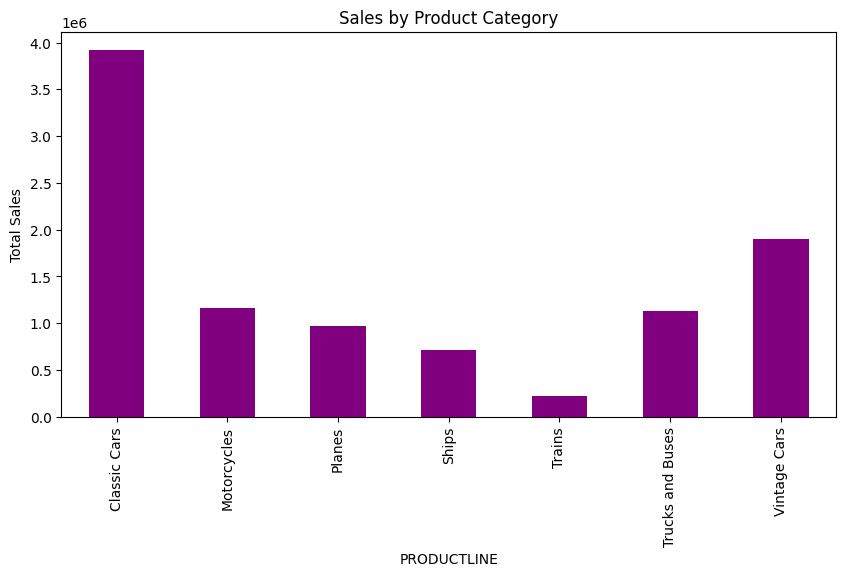

In [22]:
# Plot top categories
top_categories.plot(kind="bar", figsize=(10,5), title="Sales by Product Category", color="purple")
plt.ylabel("Total Sales")
plt.show()

In [27]:
import numpy as np
from sklearn.linear_model import LinearRegression

# Preparing data for forecasting
df["Quarter"] = ((df["MONTH_ID"] - 1) // 3) + 1
quarterly_sales = df.groupby(["YEAR_ID", "Quarter"])["SALES"].sum().reset_index()

In [28]:
# Convert data for linear regression
X = quarterly_sales[["YEAR_ID", "Quarter"]]
y = quarterly_sales["SALES"]

In [29]:
# Build and train the model
model = LinearRegression()
model.fit(X, y)

# Predict next quarter's sales (assuming new year and quarter)
next_quarter = np.array([[2025, 3]])  # Example next quarter
predicted_sales = model.predict(next_quarter)

print(f"Forecasted Sales for Next Quarter: {predicted_sales[0]:,.2f}")

Forecasted Sales for Next Quarter: 5,839,806.06


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Forecasted Sales for Q3 2025: 7,132.93


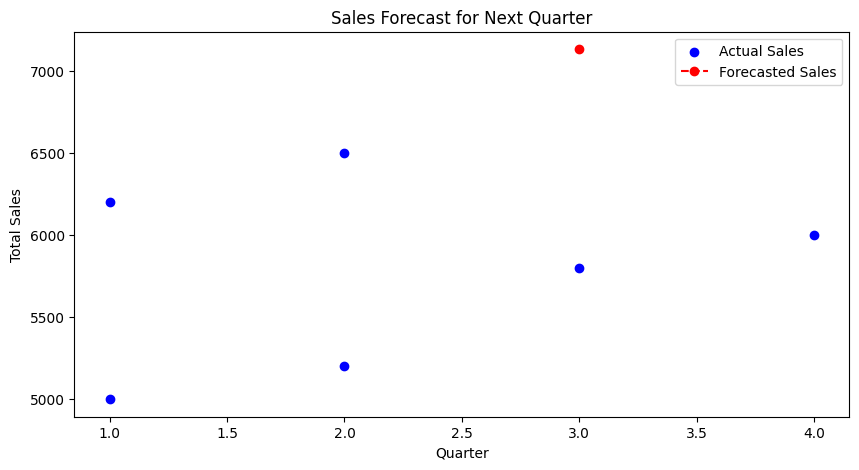

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Sample dataset: Quarterly Sales Data
df = pd.DataFrame({
    "YEAR_ID": [2022, 2022, 2023, 2023, 2024, 2024],
    "Quarter": [1, 2, 3, 4, 1, 2],
    "SALES": [5000, 5200, 5800, 6000, 6200, 6500]
})

# Prepare X (features) and y (target variable)
X = df[["YEAR_ID", "Quarter"]]
y = df["SALES"]

# Train Linear Regression model
model = LinearRegression()
model.fit(X, y)

# Predict next quarter's sales using a properly formatted DataFrame
next_quarter = pd.DataFrame({"YEAR_ID": [2025], "Quarter": [3]})
predicted_sales = model.predict(next_quarter)

# Display forecast
print(f"Forecasted Sales for Q3 2025: {predicted_sales[0]:,.2f}")

# Plot historical sales with forecast
plt.figure(figsize=(10,5))
plt.scatter(df["Quarter"], df["SALES"], label="Actual Sales", color="blue")
plt.plot(next_quarter["Quarter"], predicted_sales, marker='o', linestyle="dashed", label="Forecasted Sales", color="red")
plt.xlabel("Quarter")
plt.ylabel("Total Sales")
plt.title("Sales Forecast for Next Quarter")
plt.legend()
plt.show()
